  
<div class="alert alert-info">
<h1><center><font color=red> ANN and CNN using Tensorflow/ Keras <font></center></h1>

- By Saber Saharkhiz
</div>

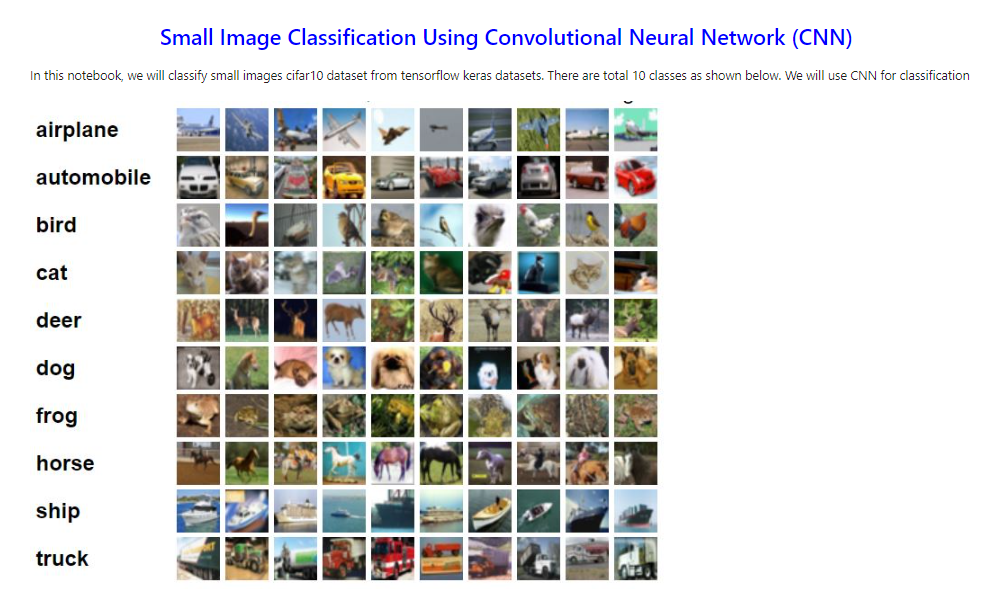

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 181s 1us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

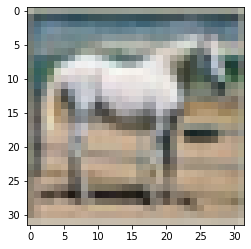

In [12]:
#showing a random data (train):
import random
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [15]:
import matplotlib.pyplot as plt
print(X_train[1]) #► it is not normal

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


In [16]:
#normalizing the dataset:
X_train= tf.keras.utils.normalize(X_train, axis=1)
X_test= tf.keras.utils.normalize(X_test, axis=1)

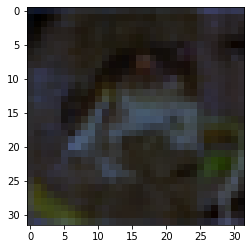

In [18]:
#Showing a normalized image:
plt.imshow(X_train[0], cmap= plt.cm.binary)
plt.show()

In [20]:
print(X_train[0]) #► it is  normal

[[[0.07182773 0.09722503 0.15002467]
  [0.05555073 0.08510671 0.1680591 ]
  [0.06416572 0.08557414 0.15041218]
  ...
  [0.19738931 0.2065452  0.30386149]
  [0.20651145 0.21914754 0.33373633]
  [0.20868805 0.22118572 0.32022806]]

 [[0.01947871 0.03136291 0.04762688]
  [0.         0.         0.        ]
  [0.02309966 0.01426236 0.        ]
  ...
  [0.15366383 0.1376968  0.15474428]
  [0.16167672 0.14551397 0.16359624]
  [0.17202664 0.15518676 0.17721359]]

 [[0.03043548 0.0376355  0.05000822]
  [0.02067004 0.01295102 0.        ]
  [0.0628824  0.04813545 0.02798366]
  ...
  [0.14741733 0.13143786 0.14067662]
  [0.16303535 0.14726715 0.16359624]
  [0.15369593 0.13021418 0.13057843]]

 ...

 [[0.25322319 0.26658477 0.22860901]
  [0.25966738 0.28307232 0.12697798]
  [0.25409624 0.28702993 0.0909469 ]
  ...
  [0.19988791 0.20810994 0.19694726]
  [0.07608316 0.05434859 0.02290347]
  [0.07473288 0.0606477  0.06218021]]

 [[0.21913545 0.21797225 0.22860901]
  [0.22349481 0.22756794 0.15685516]


In [21]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array → making it 1D (y dataset)

In [23]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [24]:
y_test = y_test.reshape(-1,)

In [25]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Building simple artificial neural network for image classification

In [26]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),   #Flatten into one dimensional
    
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')  #since we have 10 classes   
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 90s 49ms/step - loss: 2.0919 - accuracy: 0.2496
Epoch 2/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.9593 - accuracy: 0.3084
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.8855 - accuracy: 0.3387
Epoch 4/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.8227 - accuracy: 0.3639
Epoch 5/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.7734 - accuracy: 0.3803


#### You can see that at the end of 5 epochs, accuracy is at around 30%

In [27]:
#calculating classification accuracy by Sklearn for our ANN model for each epoch:

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.29      0.56      0.39      1000
           1       0.52      0.46      0.49      1000
           2       0.32      0.26      0.29      1000
           3       0.33      0.15      0.21      1000
           4       0.32      0.25      0.28      1000
           5       0.34      0.22      0.26      1000
           6       0.36      0.33      0.35      1000
           7       0.36      0.57      0.44      1000
           8       0.49      0.49      0.49      1000
           9       0.48      0.49      0.49      1000

    accuracy                           0.38     10000
   macro avg       0.38      0.38      0.37     10000
weighted avg       0.38      0.38      0.37     10000



# Building a convolutional neural network to train our images

In [29]:
cnn = models.Sequential([
    #CNN layer (Convolutional and Relu ► Pooling /...)
    #First Convolutional
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),  #random numbers of filters
    layers.MaxPooling2D((2, 2)), #like a table (2*2)
    # 2nd Convolutional
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #kernel is the size of each filter like a table
    layers.MaxPooling2D((2, 2)),
    
    #dense ayer for our classification section
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.6639 - accuracy: 0.4067
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2801 - accuracy: 0.5493
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1366 - accuracy: 0.6055
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0532 - accuracy: 0.6319
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9851 - accuracy: 0.6565
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9286 - accuracy: 0.6746
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8792 - accuracy: 0.6948
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8337 - accuracy: 0.7117
Epoch 9/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7906 - accuracy: 0.7242
Epoch 10/10
1563/1563 [==============================] - 35s 23m

- With CNN, at the end 5 epochs, accuracy was at around 65% which is a significant improvement over ANN. CNNs are best for image classification and gives super accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [30]:
#accuracy on test dataset:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0100 - accuracy: 0.6635


[1.0100017786026, 0.6635000109672546]

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]
#It is the distribution between 0 and 1 ► we need to use max of them by argmax in numpy

313/313 [==============================] - 3s 8ms/step


array([[3.5445759e-04, 2.1015732e-05, 1.5574404e-03, 9.2048490e-01,
        3.0196192e-02, 2.9590208e-02, 1.7077582e-02, 1.9883249e-04,
        4.7504279e-04, 4.4412769e-05],
       [2.4187102e-03, 7.4679708e-01, 4.7230137e-06, 4.6071200e-06,
        3.4071124e-06, 2.7596411e-07, 4.6672650e-07, 4.6358380e-08,
        2.2421449e-01, 2.6556278e-02],
       [6.8006396e-02, 3.3662431e-02, 7.1308226e-04, 5.8309606e-04,
        3.3760804e-04, 6.9398907e-06, 2.0777075e-05, 2.3236989e-04,
        8.7876195e-01, 1.7675368e-02],
       [7.9961318e-01, 1.8361475e-02, 5.0038225e-03, 2.7611799e-04,
        2.6569120e-03, 4.5263982e-06, 1.8799334e-03, 5.4863649e-05,
        1.6926482e-01, 2.8844592e-03],
       [2.9596231e-06, 3.9082309e-04, 4.8335977e-03, 2.8177885e-02,
        8.3287515e-02, 1.8059786e-03, 8.5176945e-01, 9.5188389e-06,
        2.9660333e-02, 6.1972329e-05]], dtype=float32)

In [36]:
y_predict = [np.argmax(element) for element in y_pred]  #list comprehension
y_predict[:10]

[3, 1, 8, 0, 6, 6, 1, 6, 3, 1]

In [35]:
#compared them to the acual data:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [40]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

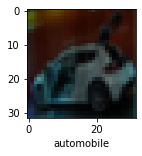

In [44]:
#showing a sample:
plot_sample(X_test, y_test,6)